In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
import gensim
from gensim.models import KeyedVectors
from gensim.models import word2vec
import spacy
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import re


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
from google.colab import drive
#!unzip gdrive/My\ Drive/data/train.zip
df = pd.read_csv('/content/drive/MyDrive/cleaned_review.csv')

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,rating,company,review
0,0,0,1,talbat,رئع
1,1,1,1,talbat,رنمج رئع جدا سعد لبه حيج شكل سرع
2,2,2,-1,talbat,طبق غتح دائ يعط وجد تصل شبك انه الن عند تمم شو...
3,3,3,-1,talbat,لمذ يمك طلب ماكدونالدز؟
4,4,4,-1,talbat,رنمج ظهر طعم غلق انه بتك فتح بقل كده كتر شهر
...,...,...,...,...,...
38157,38996,38996,1,telecom_egypt,متز عمل متز سعر بلغ شوه
38158,38997,38997,-1,telecom_egypt,رحل كوس حلة باص مش اد كده يري حدث باص حتي تكون...
38159,38998,38998,-1,telecom_egypt,جرب جيد نقص عدم همم خدم عملاء عمل مره وصل شرك ...
38160,39000,39000,-1,telecom_egypt,جيد لمذ وجد خطط كثر ريط يصل حتي ندي رمايه؟ رجو...


In [ ]:
df = df.drop(['Unnamed: 0.1'], axis=1)
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df

,rating,company,review
0,1,talbat,رئع
1,1,talbat,رنمج رئع جدا سعد لبه حيج شكل سرع
2,-1,talbat,طبق غتح دائ يعط وجد تصل شبك انه الن عند تمم شو...
3,-1,talbat,لمذ يمك طلب ماكدونالدز؟
4,-1,talbat,رنمج ظهر طعم غلق انه بتك فتح بقل كده كتر شهر
...,...,...,...
38157,1,telecom_egypt,متز عمل متز سعر بلغ شوه
38158,-1,telecom_egypt,رحل كوس حلة باص مش اد كده يري حدث باص حتي تكون...
38159,-1,telecom_egypt,جرب جيد نقص عدم همم خدم عملاء عمل مره وصل شرك ...
38160,-1,telecom_egypt,جيد لمذ وجد خطط كثر ريط يصل حتي ندي رمايه؟ رجو...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38162 entries, 0 to 38161
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rating   38162 non-null  int64 
 1   company  38162 non-null  object
 2   review   37459 non-null  object
dtypes: int64(1), object(2)
memory usage: 894.5+ KB


In [ ]:
df = df.astype({'review': 'str'})

In [ ]:
!unzip /content/drive/MyDrive/tweet_cbow_100.zip

Archive:  /content/drive/MyDrive/tweet_cbow_100.zip
  inflating: tweets_cbow_100         
  inflating: tweets_cbow_100.trainables.syn1neg.npy  
  inflating: tweets_cbow_100.wv.vectors.npy  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model_wv = gensim.models.Word2Vec.load("tweets_cbow_100")

**Using Word2Vec Embedding**

In [ ]:
#adding all reviews into a list of docs
docs = []
for doc in df['review']:
  docs.append(doc)

In [ ]:
#tokenize and vectorize the data
def vectorize(text):
    vectors = []
    tokens = word_tokenize(text)
    for token in tokens:
        try:
            vectors.append(model_wv.wv[token])
        except KeyError:
            continue
    return np.mean(vectors, axis=0)


In [ ]:
df['vector'] = df['review'].apply(lambda text: vectorize(text))
df

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


,rating,company,review,vector
0,1,talbat,رئع,NaN
1,1,talbat,رنمج رئع جدا سعد لبه حيج شكل سرع,"[1.6961856, 0.08220401, -0.33615932, -0.392516..."
2,-1,talbat,طبق غتح دائ يعط وجد تصل شبك انه الن عند تمم شو...,"[-0.22570415, 0.20668864, 0.05381265, -0.87980..."
3,-1,talbat,لمذ يمك طلب ماكدونالدز؟,"[2.3001964, -4.126458, 0.91109973, 1.2804632, ..."
4,-1,talbat,رنمج ظهر طعم غلق انه بتك فتح بقل كده كتر شهر,"[0.89374125, -0.45155722, -0.4417662, -0.02822..."
...,...,...,...,...
38157,1,telecom_egypt,متز عمل متز سعر بلغ شوه,"[1.0109402, -0.6620609, -0.24655917, -0.112242..."
38158,-1,telecom_egypt,رحل كوس حلة باص مش اد كده يري حدث باص حتي تكون...,"[0.7163581, -0.51264083, -0.11336234, -1.27559..."
38159,-1,telecom_egypt,جرب جيد نقص عدم همم خدم عملاء عمل مره وصل شرك ...,"[2.5690944, -0.10699671, 0.34229198, 0.0172564..."
38160,-1,telecom_egypt,جيد لمذ وجد خطط كثر ريط يصل حتي ندي رمايه؟ رجو...,"[0.607037, 0.27123147, 0.27895132, 0.12746403,..."


In [ ]:
df = df.dropna()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.rating,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.rating
)

In [ ]:
X_train.shape

(27062,)

In [ ]:
print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)


X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train before reshaping:  (27062,)
Shape of X_test before reshaping:  (6766,)
Shape of X_train after reshaping:  (27062, 100)
Shape of X_test after reshaping:  (6766, 100)


Checking Linearity of the Data

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_2d,y_train)
pred = lr.predict(X_test_2d)

Text(0, 0.5, 'Predictions')

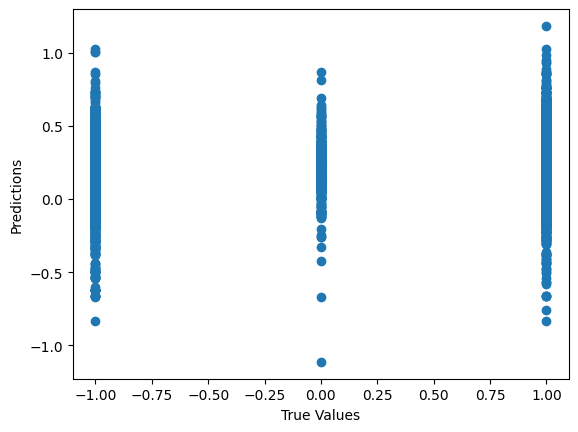

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(y_test, pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(lr.predict(X_test_2d), y_test))

-19.25119261607015


The R-squared score shows that the dataset is non-linear

Now we will apply and compare between the following models:




*   Random Forrest
*   Gradient Boosting
*   Support Vector Machine





**Random Forrest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rfc.fit(X_train_2d, y_train)

# Make predictions on test data
y_pred = rfc.predict(X_test_2d)

In [ ]:
precision = accuracy_score(y_pred, y_test) * 100
print("Accuracy with Random Forest: {0:.6f}".format(precision))
print(classification_report(y_test,y_pred))

Accuracy with Random Forest: 60.271948
              precision    recall  f1-score   support

          -1       0.52      0.26      0.35      2464
           0       0.11      0.00      0.01       329
           1       0.62      0.86      0.72      3973

    accuracy                           0.60      6766
   macro avg       0.42      0.38      0.36      6766
weighted avg       0.56      0.60      0.55      6766



**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.56      0.26      0.36      2464
           0       0.00      0.00      0.00       329
           1       0.63      0.88      0.73      3973

    accuracy                           0.61      6766
   macro avg       0.39      0.38      0.36      6766
weighted avg       0.57      0.61      0.56      6766



**SVM Classifier**

In [ ]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf = svm_clf.fit(X_train_2d, y_train)

In [ ]:
test_predictions = svm_clf.predict(X_test_2d)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with SVM: {0:.6f}".format(precision))

Accuracy with SVM: 61.720367


In [ ]:
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

          -1       0.57      0.25      0.35      2464
           0       0.00      0.00      0.00       329
           1       0.63      0.89      0.74      3973

    accuracy                           0.62      6766
   macro avg       0.40      0.38      0.36      6766
weighted avg       0.58      0.62      0.56      6766



In [ ]:
%%shell
jupyter nbconvert --to html /content/NLP_Task03.ipynb

[NbConvertApp] Converting notebook /content/NLP_Task03.ipynb to html
[NbConvertApp] Writing 657125 bytes to /content/NLP_Task03.html
